In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import time
from citipy import citipy

#api key
from config import apikey



In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [3]:
#create empty list of cites
cities = []

#generate random set of latitudes and longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
cord = zip(lats, lngs) #zip list of latitudes and longitudes together


In [4]:
for x, d in cord:
    city = citipy.nearest_city(x, d).city_name
    if city not in cities:
        cities.append(city)


In [5]:
len(cities)

592

In [6]:
#create empty lists for data that will be pulled
long = []
lat = []
max_temp = []
humidity = []
clouds = []
wind = []
country = []
name = []
date = []

In [7]:
print(f'Beginning Data Retrieval')
print(f'-----------------------------')
for x in cities:
    try:
        url = ('http://api.openweathermap.org/data/2.5/weather?q={0}&units=Imperial&APPID={1}').format(
        x, apikey)
        data = requests.get(url).json()
        data = requests.get(url).json()
        long1 = data['coord']['lon'] #pull the longitudes
        lat1 = data['coord']['lat'] #latitudes
        max_temp1 = data['main']['temp_max'] #pull high tempeture
        humidity1 = data['main']['humidity'] #pull humidity
        clouds1 = data['clouds']['all'] #pull cloudiness 
        wind1 = data['wind']['speed'] #pull windspeed
        country1 = data['sys']['country'] #pull country code
        name1 = data['name'] #pull city name
        date1 = time.strftime("%B %d, %Y",)
        long.append(long1) #append above data to the list created above
        lat.append(lat1)
        max_temp.append(max_temp1)
        humidity.append(humidity1)
        clouds.append(clouds1)
        wind.append(wind1)
        country.append(country1)
        name.append(name1)
        date.append(date1)
        print(f'Processing Record {len(name)} | {x}')
        time.sleep(0.95) #wait 0.95 seconds to move on; this keeps api requests within my rate limit
    except KeyError:
        print(f'{x} not found. Skipping...')
        time.sleep(0.95)


Beginning Data Retrieval
-----------------------------
Processing Record 1 | kapaa
attawapiskat not found. Skipping...
Processing Record 2 | paamiut
Processing Record 3 | tiksi
Processing Record 4 | omboue
Processing Record 5 | bosaso
Processing Record 6 | dikson
Processing Record 7 | tayshet
nizhneyansk not found. Skipping...
Processing Record 8 | avarua
Processing Record 9 | monrovia
Processing Record 10 | cidreira
illoqqortoormiut not found. Skipping...
Processing Record 11 | wronki
Processing Record 12 | provideniya
Processing Record 13 | rikitea
Processing Record 14 | hermanus
Processing Record 15 | puerto ayora
Processing Record 16 | hobart
Processing Record 17 | constitucion
Processing Record 18 | vostochnyy
Processing Record 19 | san patricio
rawah not found. Skipping...
Processing Record 20 | goya
Processing Record 21 | cherskiy
araguatins not found. Skipping...
Processing Record 22 | ushuaia
Processing Record 23 | nsanje
Processing Record 24 | cabo san lucas
Processing Record

Processing Record 225 | ellisras
Processing Record 226 | torbat-e jam
Processing Record 227 | ilulissat
Processing Record 228 | soe
Processing Record 229 | miri
Processing Record 230 | longyearbyen
Processing Record 231 | gondanglegi
Processing Record 232 | dunhua
Processing Record 233 | aripuana
Processing Record 234 | fuenlabrada
Processing Record 235 | maningrida
Processing Record 236 | foam lake
Processing Record 237 | zaton
Processing Record 238 | pitkyaranta
Processing Record 239 | wilmington
warqla not found. Skipping...
Processing Record 240 | kosh-agach
Processing Record 241 | greenland
tarudant not found. Skipping...
Processing Record 242 | nizhniy tsasuchey
Processing Record 243 | saint-philippe
Processing Record 244 | katsuura
Processing Record 245 | araguaina
grimari not found. Skipping...
Processing Record 246 | arinos
Processing Record 247 | nantucket
Processing Record 248 | ilhabela
Processing Record 249 | chau doc
Processing Record 250 | vila franca do campo
Processing

Processing Record 446 | yangjiang
Processing Record 447 | colares
Processing Record 448 | whitehorse
Processing Record 449 | spas-klepiki
Processing Record 450 | gotsu
Processing Record 451 | zhmerynka
tumannyy not found. Skipping...
Processing Record 452 | ahipara
Processing Record 453 | jishou
Processing Record 454 | saint-georges
Processing Record 455 | cap malheureux
Processing Record 456 | port shepstone
kytlym not found. Skipping...
Processing Record 457 | pudem
Processing Record 458 | plaster rock
Processing Record 459 | lazaro cardenas
Processing Record 460 | mezhova
Processing Record 461 | aksarka
Processing Record 462 | terra roxa
Processing Record 463 | cayenne
Processing Record 464 | lovington
Processing Record 465 | lincoln
Processing Record 466 | mangrol
Processing Record 467 | abha
Processing Record 468 | krasnogvardeyskiy
Processing Record 469 | leshukonskoye
Processing Record 470 | baillif
Processing Record 471 | saint anthony
marcona not found. Skipping...
Processing 

In [34]:
#convert lists into a dictionary
data = {'City Name': name, 'Country': country, 'Longitude': long, 'Latitude': lat, 'Maximum Tempeture': max_temp, 'Humidity': humidity,
        'Cloudiness(%)': clouds, 'Wind Speed': wind, 'Date': date}


In [35]:
#convert results from api calls into a df
df = pd.DataFrame(data)

#set path for output file
path = 'output/CityData.csv'

df.count() # make sure data is complete



City Name            528
Country              528
Longitude            528
Latitude             528
Maximum Tempeture    528
Humidity             528
Cloudiness(%)        528
Wind Speed           528
Date                 528
dtype: int64

In [36]:
#output df into a csv file
df.to_csv(path)
df.head()

,City Name,Country,Longitude,Latitude,Maximum Tempeture,Humidity,Cloudiness(%),Wind Speed,Date
0,Kapaa,US,-159.32,22.08,82.40,78,90,8.05,October 21 2019
1,Paamiut,GL,-49.67,61.99,41.22,54,0,8.12,October 21 2019
2,Tiksi,RU,128.87,71.64,2.72,90,66,6.62,October 21 2019
3,Omboue,GA,9.26,-1.57,75.76,89,59,7.29,October 21 2019
4,Bosaso,SO,49.18,11.28,80.60,78,20,8.57,October 21 2019


# Latitude vs. Temperature Plot

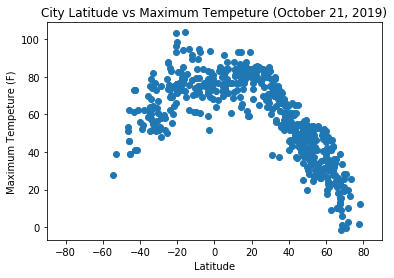

In [42]:
ddate = time.strftime("%B %d, %Y",) #set variable to current date

#create scatter plot comparing city latitude to high tempeture for current date
plt.scatter(df['Latitude'], df['Maximum Tempeture'])
plt.title(f'City Latitude vs Maximum Tempeture ({ddate})') #set title
plt.ylabel('Maximum Tempeture (F)') #set y axix 
plt.xlabel('Latitude') # set x axis
plt.xlim(lat_range) 
plt.ylim((min(df['Maximum Tempeture']) - 5), max(df['Maximum Tempeture']) + 5)
plt.show()